In [2]:
import pandas as pd
import matplotlib.pyplot as plt

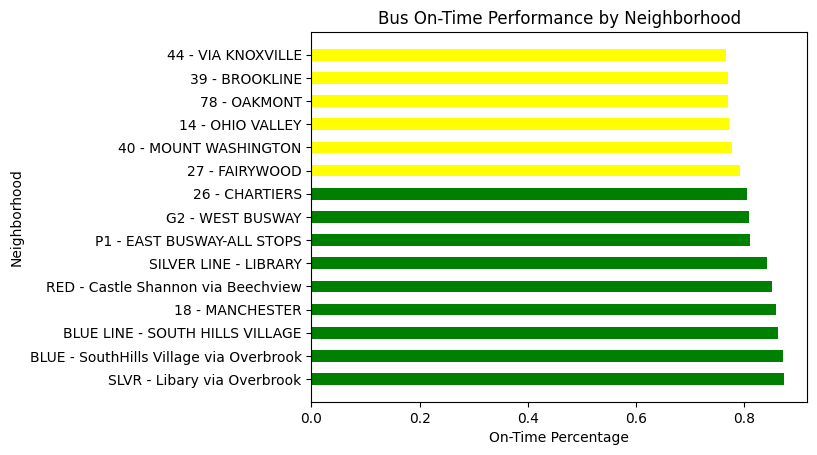

In [10]:
df = pd.read_csv("datasets/bus.csv")

grouped = df.groupby('route_full_name')['on_time_percent'].mean().nlargest(15).reset_index()

colors = []
for percentage in grouped['on_time_percent']:
    if percentage >= 0.8:
        colors.append('green')
    elif percentage >= 0.7:
        colors.append('yellow')
    else:
        colors.append('red')

plt.figure()
plt.barh(grouped['route_full_name'], grouped['on_time_percent'], color=colors, height = .5)

plt.title('Bus On-Time Performance by Neighborhood')
plt.xlabel('On-Time Percentage')
plt.ylabel('Neighborhood')

plt.show()
